## How to use xcube geoDB and explore available DeepESDL data 

This notebook demonstrates how to make use of feature data stored in xcube geoDB.

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.7.0`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [1]:
# import xcube geoDB library
from xcube_geodb.core.geodb import GeoDBClient

In [2]:
# utility needed for plotting
import matplotlib.pyplot as plt

**Please note:**
In order to access data from xcube geoDB, you need credentials.  
**If you want to store feature data in xcubes geoDB or access existing data, please contact the DeepESDL team :)**   
If the DeepESDL team has created access for you already, your credentials are saved as env variables.

In [3]:
# Connect to the xcube geodatabase. 
geodb = GeoDBClient()

Access available databases for deep-esdl to your xcube geoDB user. The below cell filters all databases for deep-esdl. **Currently no data is shared publicly for all DeepESDL users, so the output will be empty if you don't belong to a team that has included data into xcube geoDB.** 

In [4]:
df = geodb.get_my_collections()
deepesdl_collections = df[df["database"].str.contains("deep-esdl")==True]

In [5]:
deepesdl_collections

,owner,database,collection


However, lets have look at a publicly accessible collection to explore the functionality of xcube geodb.

### How to accesss EEA Urban Atlas Data

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #a94442; background-color: #f2dede; border-color: #ebccd1;">
<font size="+0.5">The full statistical validation of Urban Atlas 2018 hasn't been performed yet. The European Environment Agency accepts no responsibility or liability whatsoever with regard to use of the non-validated Urban Atlas 2018 data.</font>
</div>

To view other publicly available data stored in xcube geoDB: 

In [6]:
df = geodb.get_my_collections()
df

,owner,database,collection
0,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1
1,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a1
2,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E10a2
3,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E11
4,geodb_49a05d04-5d72-4c0f-9065-6e6827fd1871,anja,E1a
...,...,...,...
931,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ge_train_tier_2_labels
932,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ge_train_tier_2_source
933,geodb_b34bfae7-9265-4a3e-b921-06549d3c6035,stac_test,ties_ai_challenge_test
934,geodb_d2c4722a-cc19-4ec1-b575-0cdb6876d4a7,test_duplicate,test


Access a collection which is concerning EEA Urban Atlas data: 

In [7]:
ds = geodb.get_my_collections(database='eea-urban-atlas')
ds

,owner,database,collection
0,geodb_admin,eea-urban-atlas,AL001L1_TIRANA_UA2018
1,geodb_admin,eea-urban-atlas,AL003L1_ELBASAN_UA2018
2,geodb_admin,eea-urban-atlas,AL004L1_SHKODER_UA2018
3,geodb_admin,eea-urban-atlas,AL005L0_VLORE_UA2018
4,geodb_admin,eea-urban-atlas,AT001L3_WIEN_UA2018
...,...,...,...
784,geodb_admin,eea-urban-atlas,UK569L2_IPSWICH_UA2018
785,geodb_admin,eea-urban-atlas,UK571L1_CHELTENHAM_UA2018
786,geodb_admin,eea-urban-atlas,XK001L1_PRISTINA_UA2018
787,geodb_admin,eea-urban-atlas,XK002L1_PRIZREN_UA2018


In the table 'METADATA' you can find a list of all collections with a link to the corresponding metadata xml. A METADATA table might not be available for other databases.

In [8]:
metadata = geodb.get_collection('METADATA', database='eea-urban-atlas')
metadata

,id,created_at,modified_at,geometry,table_name,disclaimer,metadata_url
0,1,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),EL004L1_IRAKLEIO_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
1,2,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),RO509L1_SATU_MARE_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
2,3,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),PL018L2_ZIELONA_GORA_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
3,4,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),UK009L1_CARDIFF_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
4,5,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),TR046L1_RIZE_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
...,...,...,...,...,...,...,...
783,781,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),SE505L1_BORAS_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
784,782,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),HU006L2_SZEGED_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
785,783,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),BG002L2_PLOVDIV_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...
786,787,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),ES003L3_VALENCIA_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...


Let's checkout the metadata for Hamburg:

In [9]:
metadata.loc[metadata['table_name'] == 'DE002L1_HAMBURG_UA2018']

,id,created_at,modified_at,geometry,table_name,disclaimer,metadata_url
669,668,2021-03-10T11:35:20.29555+00:00,None,POINT (0 0),DE002L1_HAMBURG_UA2018,The full statistical validation of Urban Atlas...,https://edc-eea-urban-atlas.s3.eu-central-1.am...


In [10]:
data_hh = geodb.get_collection_pg('DE002L1_HAMBURG_UA2018', database='eea-urban-atlas')
data_hh

,id,created_at,modified_at,geometry,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment
0,1,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4313681.147 3358339.107, 43136...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,8738-DE002L1,136.705206,1053.511488,None
1,2,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4286000 3386090.175, 4285988.6...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,14614-DE002L1,3036.494939,78551.793270,None
2,3,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4313000 3385378.38, 4313079.61...",DE,Hamburg,DE002L1,12100,"Industrial, commercial, public, military and p...",2020-06,41718-DE002L1,2902.369992,128039.625423,None
3,4,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4336445.628 3378746.092, 43364...",DE,Hamburg,DE002L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-06,12579-DE002L1,3491.080254,106401.321126,None
4,5,2021-03-02T09:42:42.07546+00:00,None,"MULTIPOLYGON (((4327413.933 3382235.972, 43273...",DE,Hamburg,DE002L1,11100,Continuous urban fabric (S.L. : > 80%),2020-06,2191-DE002L1,171.049974,1721.083818,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75878,75879,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4349391.84 3384947.19, 4349381...",DE,Hamburg,DE002L1,31000,Forests,2020-06,74168-DE002L1,1236.112475,33920.248741,None
75879,75880,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4341241.425 3387281.552, 43412...",DE,Hamburg,DE002L1,31000,Forests,2020-06,74482-DE002L1,4935.325690,452405.287895,None
75880,75881,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4359519.682 3395155.954, 43594...",DE,Hamburg,DE002L1,40000,Wetlands,2020-06,74611-DE002L1,1009.438947,23861.015193,None
75881,75882,2021-03-02T09:46:22.184492+00:00,None,"MULTIPOLYGON (((4321000 3382076.364, 4320988.6...",DE,Hamburg,DE002L1,50000,Water,2020-06,75629-DE002L1,848.674936,21765.647478,None


Are you eager to vizualise the data? Here we go, import matplotlib first and then you can go ahead and plot the data. Again - it takes a few moments, after all there are 75883 polygons in the data :)

<Axes: >

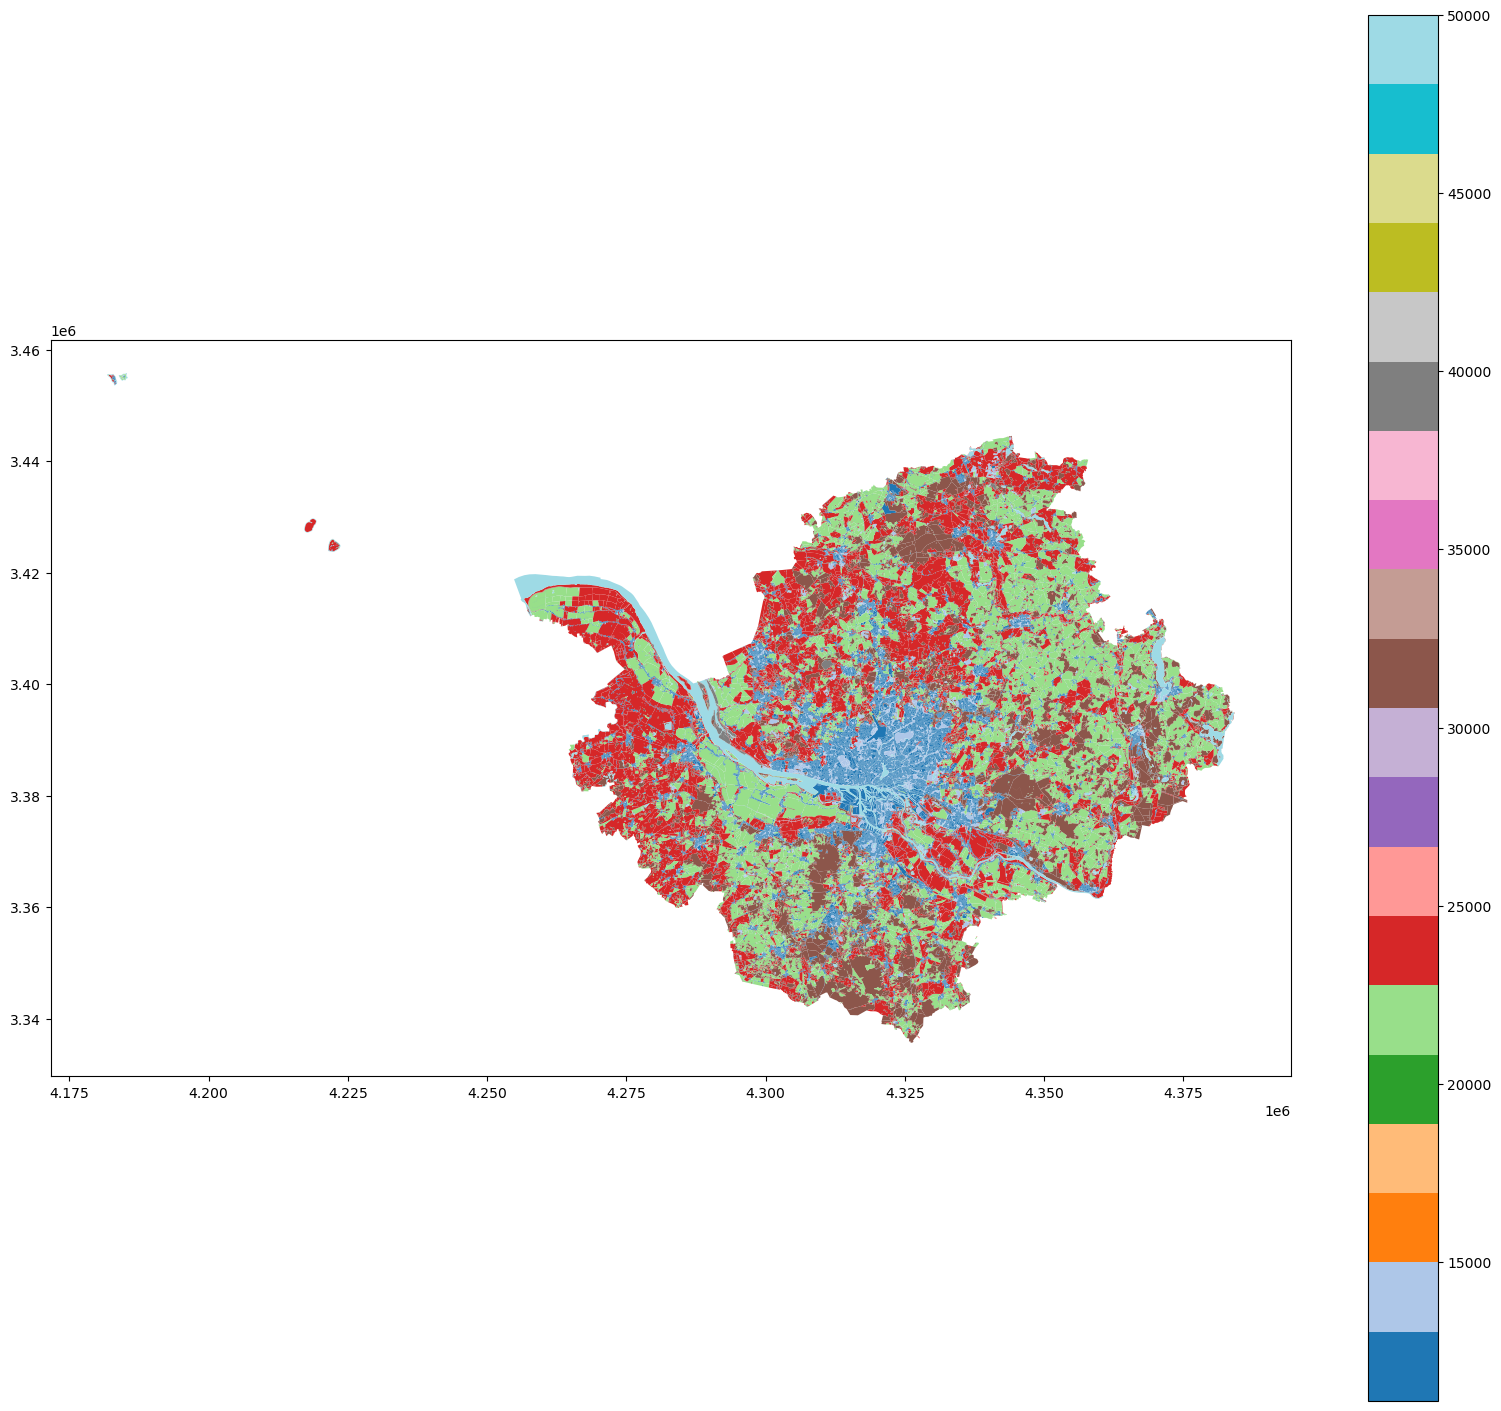

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,18))
data_hh.plot(column="code_2018", cmap="tab20", ax=ax, legend=True)

For more recently added collections you can view the history of a collection, to see what has happened to it so far. Unfortunatly, EEA Urban Atlas data was added before the history feature appeared in xcube geoDB. It also has not been modified since then, therefor the output is empty.

In [12]:
geodb.get_event_log('DE002L1_HAMBURG_UA2018', database='eea-urban-atlas')

,event_type,message,username,date
